# Ad_ACH CART - 25 CLASSES DE TRANSIÇÃO - ACH

# 1.   Tratamento de dados e estatística descritiva

O banco de dados contém, em cada linha, uma ocorrência de erosão (pontual). A coluna "Class" corresponde à variável resposta, sendo 1 para a ocorrência de erosão e 0 para a não ocorrência de erosão. A proproção entre a ocorrência de erosão e não erosão é da ordem de 1:1.2. Essa proporção desba;anceada foi propositalmente adotada por tratar-se de um fenômeno da natural, cuja ocorrência é predominantemente negativa por natureza.

Para cada resposta positiva ou negativa está associada à uma área de contribuição HÍDRICA. Logo, as demais colunas do banco de dados (atributos VALUE_101, VALUE_110 [...] VALUE_2626) correspondem às classes de transição de usos que incidem sobre esta área de contribuição, cujos valores se referem à área superficial, em metros quadrados, da ocorrência de determinada classe Essas transições se referem à mudanças observadas num intervalo de 20 anos,  1990 e 2010.

In [1]:
import pandas as pd

# URL do arquivo CSV no GitHub (substitua pelo seu link)
url = "https://github.com/tatianeolivatto/TCC_USP_TFO/raw/refs/heads/main/1990_2010.csv"

# Ler o CSV diretamente
d_ACH = pd.read_csv(url)

# Exibir as primeiras linhas
print(d_ACH.shape)
d_ACH.head()

(3093, 30)


,FID,IDENTIFICA,CID,Class,VALUE,VALUE_101,VALUE_110,VALUE_114,VALUE_122,VALUE_126,...,VALUE_2201,VALUE_2210,VALUE_2214,VALUE_2222,VALUE_2226,VALUE_2601,VALUE_2610,VALUE_2614,VALUE_2622,VALUE_2626
0,0,RAVINA,0,1,0,0.0,0.0,878.50524,878.50524,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,RAVINA,1,1,1,0.0,0.0,0.00000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,RAVINA,2,1,2,0.0,0.0,0.00000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,VOCOROCA,3,1,3,0.0,0.0,0.00000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,RAVINA,4,1,4,0.0,0.0,0.00000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
# Excluir colunas pelo indesejadas
# FID = excluir pois é apenas o índice exportado do ArcGIS
# VALUE = porque é a coluna de equivalência com CId_ACH (ou seja, CID = VALUE)
d_ACH = d_ACH.drop(d_ACH.columns[[0, 1, 4]], axis=1)

# Converter a coluna CID e Class para tipo categórico
d_ACH['CID'] = d_ACH['CID'].astype('category')
d_ACH['Class'] = d_ACH['Class'].astype('category')

print("Número de linhas e colunas após o dropout:", d_ACH.shape)
d_ACH.head()

Número de linhas e colunas após o dropout: (3093, 27)


,CID,Class,VALUE_101,VALUE_110,VALUE_114,VALUE_122,VALUE_126,VALUE_1001,VALUE_1010,VALUE_1014,...,VALUE_2201,VALUE_2210,VALUE_2214,VALUE_2222,VALUE_2226,VALUE_2601,VALUE_2610,VALUE_2614,VALUE_2622,VALUE_2626
0,0,1,0.0,0.0,878.50524,878.50524,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,0.0,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,1,0.0,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,1,0.0,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,1,0.0,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Renomeando colunas de classes

In [3]:
# Estrutura de equivalência entre colunas
rename_map = {
    'VALUE_101': 'F_F',
    'VALUE_110': 'F_AR',
    'VALUE_114': 'F_AG',
    'VALUE_122': 'F_NV',
    'VALUE_126': 'F_A',
    'VALUE_1001': 'AR_F',
    'VALUE_1010': 'AR_AR',
    'VALUE_1014': 'AR_AG',
    'VALUE_1022': 'AR_NV',
    'VALUE_1026': 'AR_A',
    'VALUE_1401': 'AG_F',
    'VALUE_1410': 'AG_AR',
    'VALUE_1414': 'AG_AG',
    'VALUE_1422': 'AG_NV',
    'VALUE_1426': 'AG_A',
    'VALUE_2201': 'NV_F',
    'VALUE_2210': 'NV_AR',
    'VALUE_2214': 'NV_AG',
    'VALUE_2222': 'NV_NV',
    'VALUE_2226': 'NV_A',
    'VALUE_2601': 'A_F',
    'VALUE_2610': 'A_AR',
    'VALUE_2614': 'A_AG',
    'VALUE_2622': 'A_NV',
    'VALUE_2626': 'A_A',
}

# Renomeando colunas
d_ACH = d_ACH.rename(columns=rename_map)

d_ACH.head()

,CID,Class,F_F,F_AR,F_AG,F_NV,F_A,AR_F,AR_AR,AR_AG,...,NV_F,NV_AR,NV_AG,NV_NV,NV_A,A_F,A_AR,A_AG,A_NV,A_A
0,0,1,0.0,0.0,878.50524,878.50524,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,0.0,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,1,0.0,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,1,0.0,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,1,0.0,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Codificação e normalização

Aqui os dados foram reestruturados em codificação baseada em frequência e normalização por linha, ou seja, cada variável independente corresponderá à porcentagem de ocorrência de cada classe de transição (e não mais a área), de modo que a soma dos valores presentes numa mesma linha seja sempre igual a 1.

In [4]:
# Selecionar as colunas de interesse (índices 2 a 27)
cols_attr = d_ACH.columns[2:]  # Lembre-se que o índice superior é exclusivo

# Calcular a soma de cada linha para essas colunas
row_sums = d_ACH[cols_attr].sum(axis=1)

# Dividir cada valor pela soma da linha correspondente
d_ACH[cols_attr] = d_ACH[cols_attr].div(row_sums, axis=0)

# Exibir resultado
print("DataFrame com valores normalizados para percentuais:")
d_ACH.head(5)


DataFrame com valores normalizados para percentuais:


,CID,Class,F_F,F_AR,F_AG,F_NV,F_A,AR_F,AR_AR,AR_AG,...,NV_F,NV_AR,NV_AG,NV_NV,NV_A,A_F,A_AR,A_AG,A_NV,A_A
0,0,1,0.0,0.0,0.020833,0.020833,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,1,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,1,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,1,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Tipologia de variáveis e resumo estatístico



In [5]:
# Verificar o tipo de dado do dataframe
print(d_ACH.dtypes)

CID      category
Class    category
F_F       float64
F_AR      float64
F_AG      float64
F_NV      float64
F_A       float64
AR_F      float64
AR_AR     float64
AR_AG     float64
AR_NV     float64
AR_A      float64
AG_F      float64
AG_AR     float64
AG_AG     float64
AG_NV     float64
AG_A      float64
NV_F      float64
NV_AR     float64
NV_AG     float64
NV_NV     float64
NV_A      float64
A_F       float64
A_AR      float64
A_AG      float64
A_NV      float64
A_A       float64
dtype: object


In [6]:
 d_ACH.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
F_F,3093.0,0.14,0.32,0.0,0.0,0.00,0.00,1.00
F_AR,3093.0,0.00,0.00,0.0,0.0,0.00,0.00,0.03
F_AG,3093.0,0.02,0.12,0.0,0.0,0.00,0.00,1.00
F_NV,3093.0,0.01,0.06,0.0,0.0,0.00,0.00,1.00
F_A,3093.0,0.00,0.00,0.0,0.0,0.00,0.00,0.05
AR_F,3093.0,0.00,0.02,0.0,0.0,0.00,0.00,1.00
AR_AR,3093.0,0.00,0.04,0.0,0.0,0.00,0.00,1.00
AR_AG,3093.0,0.00,0.00,0.0,0.0,0.00,0.00,0.25
AR_NV,3093.0,0.00,0.03,0.0,0.0,0.00,0.00,1.00
AR_A,3093.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00


## Investigação de frequências

Primeiro em relação à variável dependente (resposta/target):

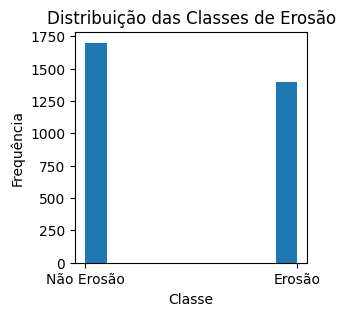

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotando o histograma para a variável CLASS

plt.figure(figsize=(3, 3))
plt.hist(d_ACH['Class'])

# Adicionando título e rótulos
plt.title("Distribuição das Classes de Erosão")
plt.xlabel("Classe")
plt.ylabel("Frequência")
plt.xticks([0, 1], ['Não Erosão', 'Erosão'])

# Exibir o gráfico
plt.show()

Agora em relação às variáveis independente (explicativas/features):



*   Acumulado percentual (soma) por variável (à esquerda);
*   Frequência de ocorrência de algum valor para a clase (à direita).

## Boxplot e Violinplot

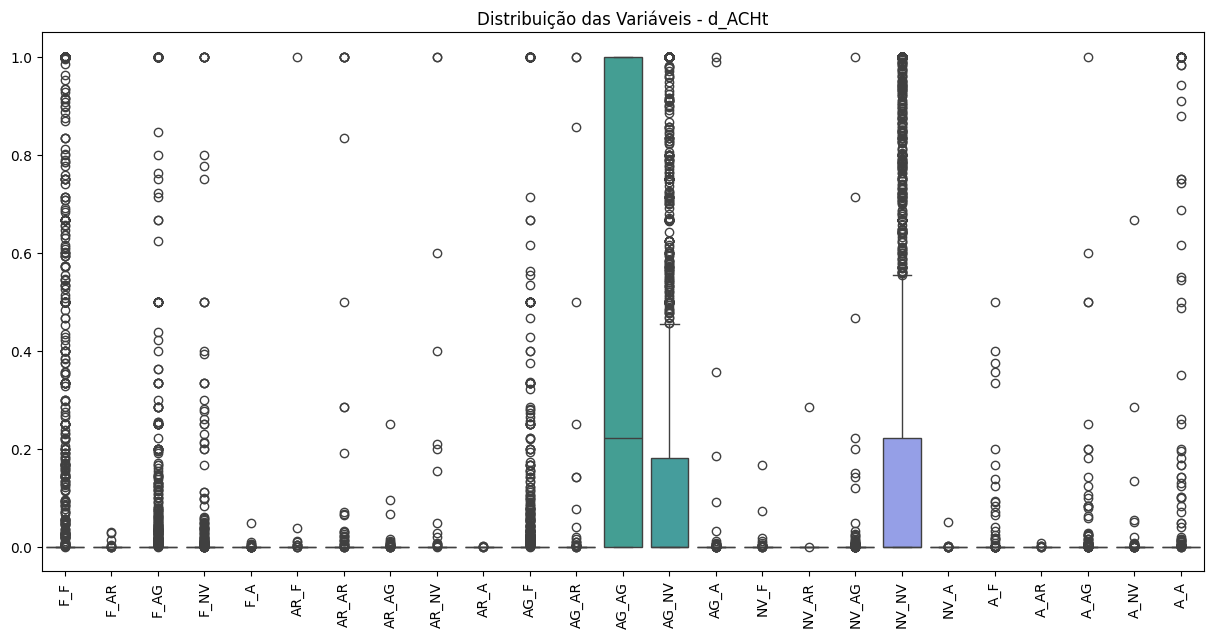

In [39]:
# Criar boxplots para cada coluna de interesse
plt.figure(figsize=(15, 7))
sns.boxplot(data=d_ACH.iloc[:, 2:], showfliers=True)  # Colunas de 2 a 27
plt.title("Distribuição das Variáveis - d_ACHt")
plt.xticks(rotation=90)  # Rotacionar os nomes das colunas
plt.show()


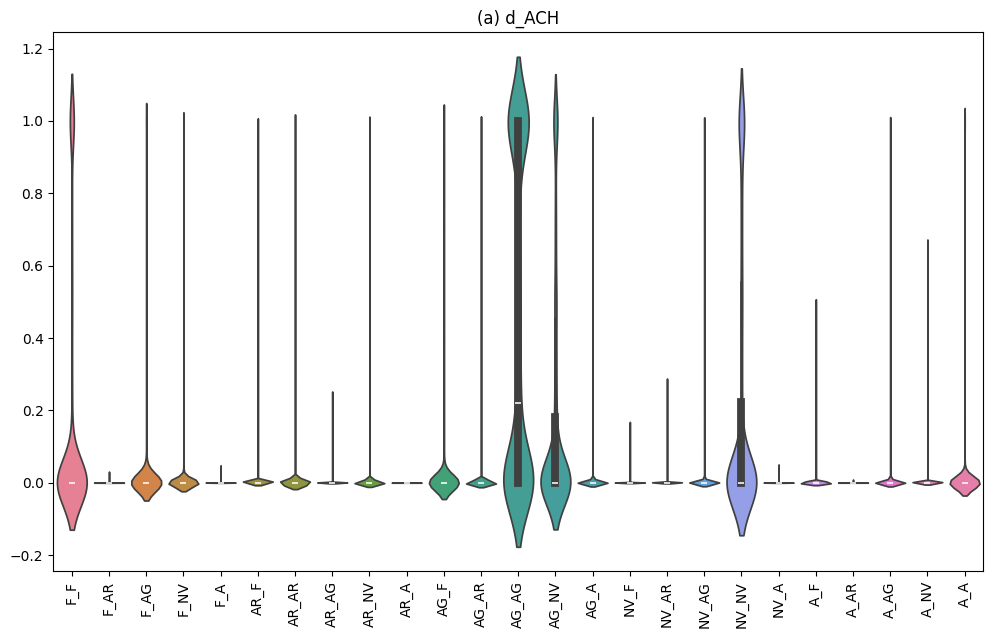

In [42]:
# Criar violin para cada coluna de interesse
plt.figure(figsize=(12, 7))
sns.violinplot(data=d_ACH.iloc[:, 2:]) # Colunas de 2 a 27
plt.title("(a) d_ACH")
plt.xticks(rotation=90)  # Rotacionar os nomes das colunas
plt.show()


## Matriz de dispersão

OBS.: DEMORA MUITO pra ser gerado, pois são muitas variáveis.
Então esta etapa do código será mantida, mas não será acrescentado aos resultados da versão final do TCC.

In [ ]:
from matplotlib.patches import Patch

# Selecionar as colunas de 2 a 27 e a variável resposta 'CLASS' (índice 1)
columns_of_interest = d_ACH.iloc[:, 1:].copy()

# Gerar o gráfico de dispersão com seaborn
pairplot = sns.pairplot(columns_of_interest, hue='Class', palette={0: "orange", 1: "blue"}, plot_kws={'alpha': 0.7}, diag_kind='hist')

# Ajustar espaçamento para evitar sobreposição
pairplot.fig.subplots_adjust(top=0.5)

plt.show()

Output hidden; open in https://colab.research.google.com to view.

## Investigação da correlação

I.   Correlação de Pearson (geral)

*  Mede a **relação linear entre duas variáveis**. Varia entre -1 (correlação negativa perfeita) e +1 (correlação positiva perfeita), com 0 indicando nenhuma correlação linear.
*  A correlação de Pearson é mais sensível a relações lineares e pode ser afetada por outliers.


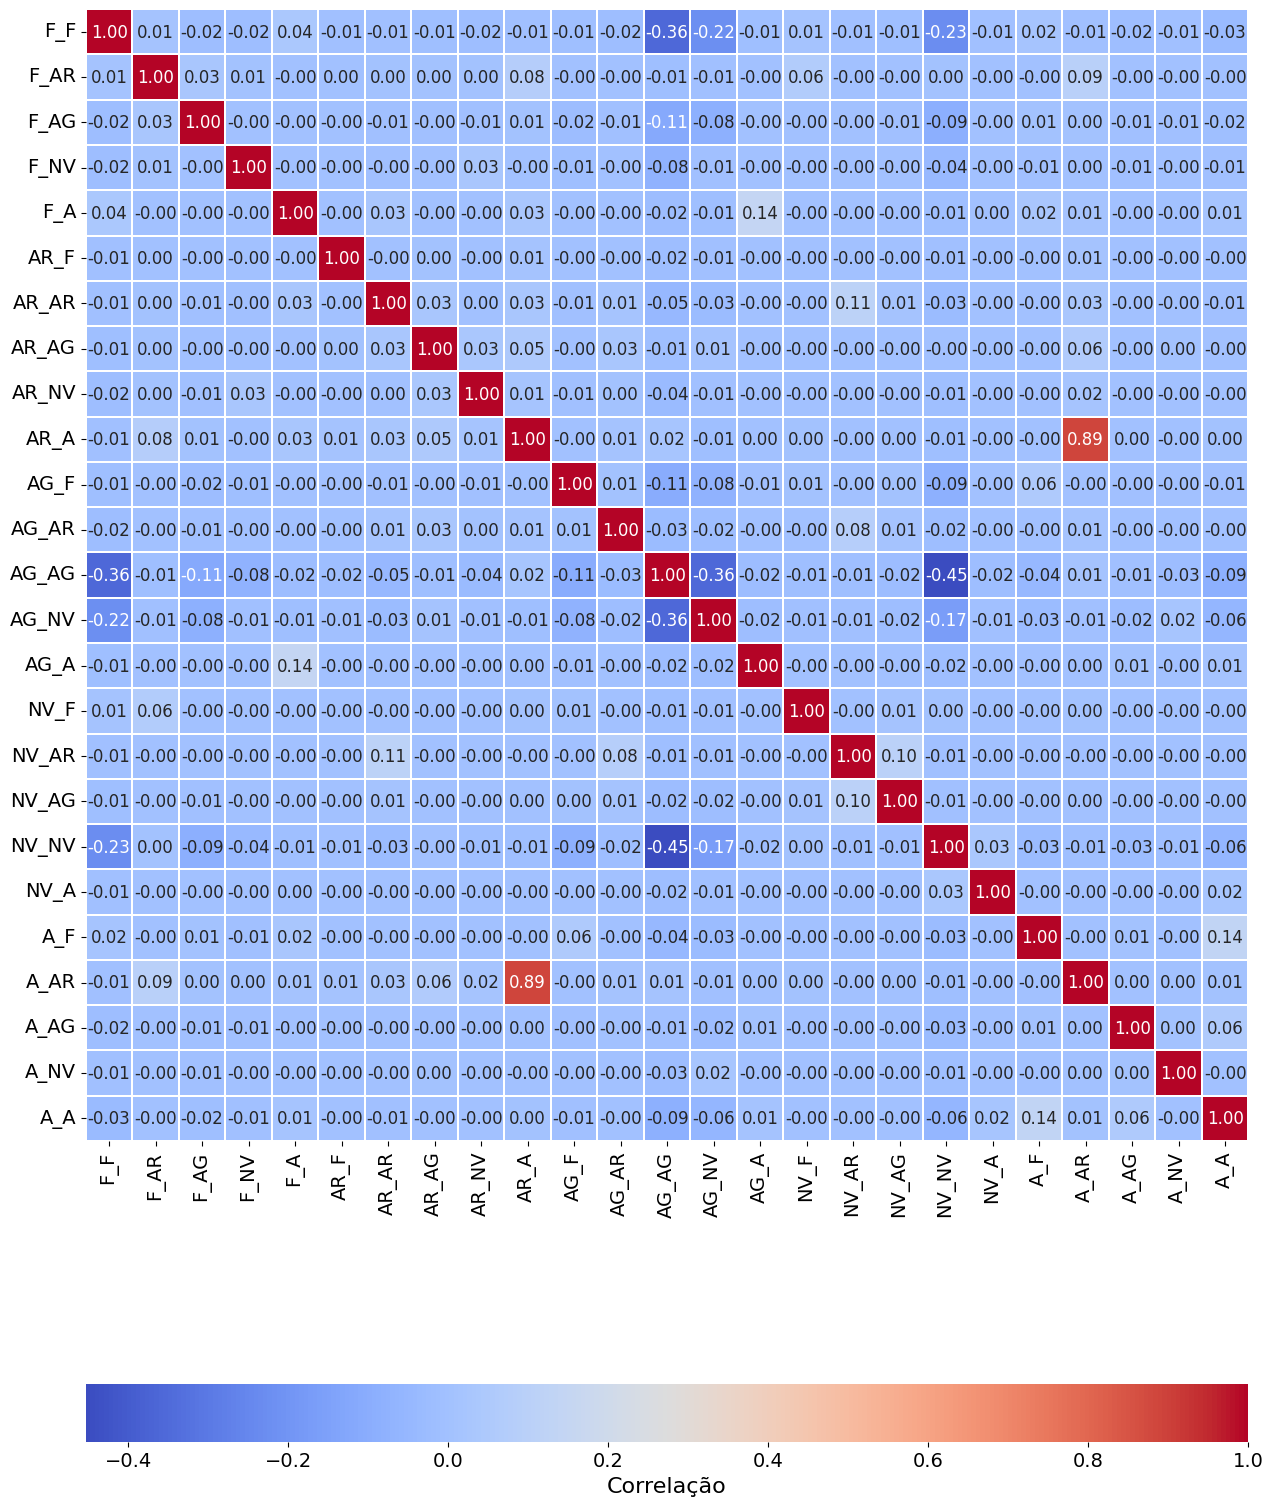

In [43]:
# Selecionar as colunas de 2 a 27 - contínuas
cols_of_interest = d_ACH.iloc[:, 2:].copy()

# Calcular a matriz de correlação entre essas colunas e a variável CLASS
corr_matrix = cols_of_interest.corr(method='pearson')

import matplotlib.pyplot as plt
import seaborn as sns

# Criar a figura e o eixo do heatmap
plt.figure(figsize=(15, 21))
ax = sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    linewidths=0.25,
    annot_kws={"size": 12},  # Aumenta o tamanho dos valores dentro das células
    cbar_kws={"label": "Correlação", "orientation": "horizontal"}  # Define a barra como horizontal
)

# Ajustar o tamanho e a posição da barra de cores
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=14)  # Aumenta o tamanho dos números da barra de cores
cbar.set_label("Correlação", size=16)  # Define o rótulo da barra com um tamanho maior
cbar.ax.xaxis.set_ticks_position('bottom')  # Garante que os ticks fiquem na parte inferior

# Ajustar a rotação e o tamanho dos rótulos dos eixos X e Y
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14, rotation=0)
#plt.title("Matriz de Correlação de Pearson - Variáveis Explicativas (d_ACH)")

plt.show()

II.   Correlação de Spearman (geral)

*   Mede a relação monotônica entre as variáveis, ou seja, se uma variável tende a aumentar (ou diminuir) à medida que a outra faz o mesmo, mas **sem exigir que essa relação seja linear**. Varia entre -1 e +1, com 0 indicando nenhuma correlação monotônica.
* A correlação de Spearman é mais robusta a outliers, já que avalia a ordem dos dados e não os valores absolutos.

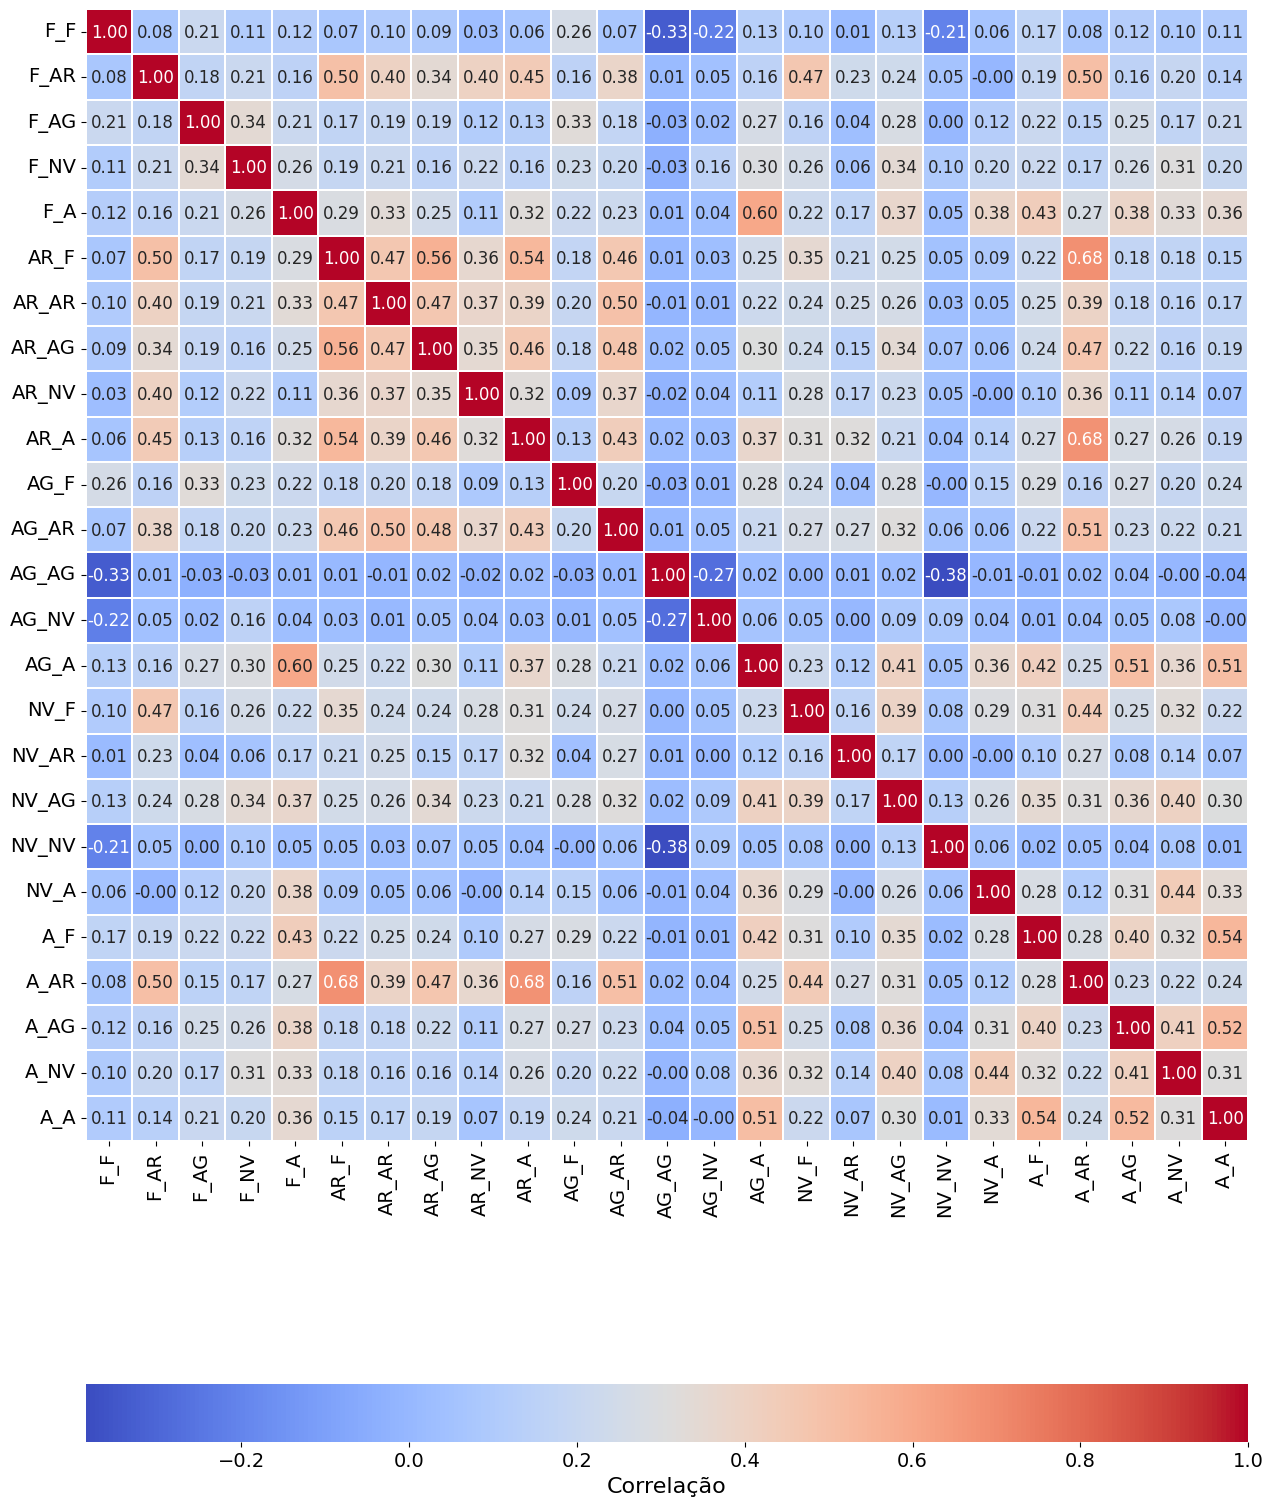

In [44]:
# Selecionar as colunas de 2 a 27 - contínuas

# Calcular a matriz de correlação entre essas colunas e a variável CLASS
corr_matrix = cols_of_interest.corr(method='spearman')

# Criar a figura e o eixo do heatmap
plt.figure(figsize=(15, 21))
ax = sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    linewidths=0.25,
    annot_kws={"size": 12},  # Aumenta o tamanho dos valores dentro das células
    cbar_kws={"label": "Correlação", "orientation": "horizontal"}  # Define a barra como horizontal
)

# Ajustar o tamanho e a posição da barra de cores
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=14)  # Aumenta o tamanho dos números da barra de cores
cbar.set_label("Correlação", size=16)  # Define o rótulo da barra com um tamanho maior
cbar.ax.xaxis.set_ticks_position('bottom')  # Garante que os ticks fiquem na parte inferior

# Ajustar a rotação e o tamanho dos rótulos dos eixos X e Y
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14, rotation=0)

#plt.title("Matriz de Correlação de Spearman - Variáveis Explicativas (d_ACH)"))
plt.show()

III. Analisando as correlações com foco na **relação das variáveis explicativas com a variável resposta**.

*   Pearson
*   Spearman

# Correlação entre as variáveis explicativas e a variável resposta

In [45]:
# Definindo X e y a partir do DataFrame

X = d_ACH.iloc[:, 2:]  # Variáveis independentes (colunas de 2 a 27)
y = d_ACH['Class']  # Variável dependente (coluna 'Class')

In [46]:
import pandas as pd
from scipy.stats import mannwhitneyu

# Garantir que a ordem das colunas em 'cols_of_interest' seja a mesma para todos os DataFrames
cols_of_interest = X.columns  # Agora usamos as colunas de X, já que são as variáveis independentes

# Calcular a correlação de Pearson e Spearman entre X e y
pearson_results = X.apply(lambda col: col.corr(y, method='pearson'))  # Correlação de Pearson entre X e y
spearman_results = X.apply(lambda col: col.corr(y, method='spearman'))  # Correlação de Spearman entre X e y

# Calcular o teste U de Mann-Whitney entre X e y (Amostra binária)
u_results = X.apply(lambda col: mannwhitneyu(col[y == 0], col[y == 1], alternative='two-sided').pvalue)

# Criar DataFrame com os resultados de correlação
results_df = pd.DataFrame({
    'Variable': cols_of_interest,
    'Pearson': [round(pearson_results[col], 2) for col in cols_of_interest],
    'Spearman': [round(spearman_results[col], 2) for col in cols_of_interest],
    'U-test p-value': [f'{u_results[col]:.2e}' for col in cols_of_interest]  # Exponencial com 2 casas decimais
})

# Exibir os resultados com a ordem desejada
print(results_df)


   Variable  Pearson  Spearman U-test p-value
0       F_F    -0.35     -0.34       2.49e-79
1      F_AR     0.04      0.05       8.07e-03
2      F_AG    -0.08     -0.05       4.53e-03
3      F_NV    -0.00      0.04       2.52e-02
4       F_A    -0.03     -0.06       1.13e-03
5      AR_F    -0.01      0.02       2.14e-01
6     AR_AR     0.03      0.01       6.79e-01
7     AR_AG     0.03      0.04       4.96e-02
8     AR_NV     0.03      0.06       1.93e-03
9      AR_A     0.02      0.01       5.01e-01
10     AG_F    -0.08     -0.08       1.17e-05
11    AG_AR     0.00      0.03       5.92e-02
12    AG_AG     0.12      0.18       8.23e-23
13    AG_NV     0.22      0.33       8.05e-76
14     AG_A    -0.03     -0.06       1.91e-03
15     NV_F    -0.02      0.01       6.70e-01
16    NV_AR    -0.02      0.00       8.89e-01
17    NV_AG     0.01      0.02       3.96e-01
18    NV_NV     0.06      0.13       1.80e-13
19     NV_A    -0.02     -0.03       1.11e-01
20      A_F    -0.05     -0.09    

##LazyClassifier

In [ ]:
!pip install lazypredict

In [ ]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, recall_score
import pandas as pd
import numpy as np

# Configuração do K-Fold_ACH Cross Validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Armazenar os resultados de cada modelo
model_results = []

# Loop para realizar o K-Fold
for fold, (train_idx, test_idx) in enumerate(kf.split(X, y), 1):
    print(f"\nFold_ACH {fold}:")

    # Dividir os dados em treino e teste para este fold
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Instanciar o LazyClassifier
    clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

    # Treinar e avaliar os modelos
    models, predictions = clf.fit(X_train, X_test, y_train, y_test)

    # Adicionar o fold_ACH atual nos resultados
    models['Fold'] = fold
    model_results.append(models)

# Combinar os resultados de todos os folds
final_results = pd.concat(model_results)

# Exibir os resultados agregados (média e desvio padrão por modelo)
summary = final_results.groupby(final_results.index).agg(
    Accuracy_Mean=('Accuracy', 'mean'),
    Accuracy_Std=('Accuracy', 'std'),
    Time_Mean=('Time Taken', 'mean')
).sort_values(by='Accuracy_Mean', ascending=False)

print("\nResultados Agregados (K-Fold):")
print(summary)

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)



Fold_ACH 1:


100%|██████████| 32/32 [00:06<00:00,  5.18it/s]


[LightGBM] [Info] Number of positive: 1114, number of negative: 1360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000936 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1085
[LightGBM] [Info] Number of data points in the train set: 2474, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.450283 -> initscore=-0.199528
[LightGBM] [Info] Start training from score -0.199528

Fold_ACH 2:


100%|██████████| 32/32 [00:04<00:00,  7.50it/s]


[LightGBM] [Info] Number of positive: 1114, number of negative: 1360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000455 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1055
[LightGBM] [Info] Number of data points in the train set: 2474, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.450283 -> initscore=-0.199528
[LightGBM] [Info] Start training from score -0.199528

Fold_ACH 3:


100%|██████████| 32/32 [00:04<00:00,  7.85it/s]


[LightGBM] [Info] Number of positive: 1114, number of negative: 1360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000410 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1065
[LightGBM] [Info] Number of data points in the train set: 2474, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.450283 -> initscore=-0.199528
[LightGBM] [Info] Start training from score -0.199528

Fold_ACH 4:


100%|██████████| 32/32 [00:05<00:00,  5.43it/s]


[LightGBM] [Info] Number of positive: 1115, number of negative: 1360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000480 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1060
[LightGBM] [Info] Number of data points in the train set: 2475, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.450505 -> initscore=-0.198630
[LightGBM] [Info] Start training from score -0.198630

Fold_ACH 5:


100%|██████████| 32/32 [00:04<00:00,  6.93it/s]

[LightGBM] [Info] Number of positive: 1115, number of negative: 1360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000539 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1099
[LightGBM] [Info] Number of data points in the train set: 2475, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.450505 -> initscore=-0.198630
[LightGBM] [Info] Start training from score -0.198630

Resultados Agregados (K-Fold):
                               Accuracy_Mean  Accuracy_Std  Time_Mean
Model                                                                
RandomForestClassifier                  0.70          0.02       0.43
ExtraTreesClassifier                    0.70          0.02       0.32
AdaBoostClassifier                      0.70          0.03       0.21
BaggingClassifier                       0.69          0.01     

# Árvore de Decisão - CART

### Etapa 1: Divisão Inicial dos Dados e Configuração do Treinamento

Nesta etapa, os dados foram separados em três conjuntos (de forma estratificada):


1.   Conjunto de **Validação** (20% dos dados) - não participam do treinamento
2.   Conjunto de **Treinamento e Teste** (80% dos dados), onde depois foi implementado o **K-Fold_ACH Cross-Validation**

Para encontrar os hiperparâmetros mais adequados para o modelo, foi adotada a estratégia de RandomizedSearchCV.

In [7]:
# Definindo X e y a partir do seu DataFrame
X = d_ACH.iloc[:, 2:]  # Variáveis independentes (colunas de 2 a 27)
y = d_ACH['Class']  # Variável dependente (coluna 'Class')

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, make_scorer, roc_auc_score
from scipy.stats import randint, uniform

# Divisão inicial (80% treino/teste, 20% validação)
X_train_test, X_val, y_train_test, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Parâmetros para testar (agora com distribuições aleatórias)
param_dist_ACH = {
    'max_depth': randint(5, 10),  # Aleatório entre 5 e 10 (intervalo aberto no scipy)
    'min_samples_split': randint(25, 50),  # Aleatório entre 25 e 50
    'min_samples_leaf': randint(10, 30),  # Aleatório entre 5 e 25
    'min_impurity_decrease': uniform(0.001, 0.009),  # Valores contínuos entre 0.001 e 0.01
}

# Configuração do modelo base
cart_model = DecisionTreeClassifier(random_state=42, criterion="gini", class_weight='balanced')

# Configuração do RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=cart_model,
    param_distributions=param_dist_ACH,
    n_iter=50,  # Número de combinações aleatórias a serem testadas
    cv=5,  # 5-Fold Cross Validation estratificado por padrão
    scoring='recall',  # Métrica a ser otimizada
    refit='recall',
    n_jobs=-1,  # Usar todos os núcleos disponíveis
    verbose=1,
    random_state=42  # Para reprodutibilidade
)

# Realizar a busca pelos melhores parâmetros
random_search.fit(X_train_test, y_train_test)

# Exibir os melhores parâmetros e o melhor score
print("\nMelhores parâmetros encontrados:", random_search.best_params_)
print("Melhor métrica na validação cruzada:", random_search.best_score_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits

Melhores parâmetros encontrados: {'max_depth': 7, 'min_impurity_decrease': 0.0051332400276928045, 'min_samples_leaf': 13, 'min_samples_split': 32}
Melhor métrica na validação cruzada: 0.8851290752636045


In [9]:
# Métricas treino_teste
best_model = random_search.best_estimator_
y_traintest_ACH = best_model.predict(X_train_test)

print("\nRelatório de classificação no conjunto de validação:")
print(classification_report(y_train_test, y_traintest_ACH))


Relatório de classificação no conjunto de validação:
              precision    recall  f1-score   support

           0       0.84      0.52      0.64      1360
           1       0.60      0.88      0.71      1114

    accuracy                           0.68      2474
   macro avg       0.72      0.70      0.68      2474
weighted avg       0.73      0.68      0.68      2474



In [10]:
# Avaliar o melhor modelo no conjunto de validação
best_model = random_search.best_estimator_
y_pred_ACH = best_model.predict(X_val)

print("\nRelatório de classificação no conjunto de validação:")
print(classification_report(y_val, y_pred_ACH))



Relatório de classificação no conjunto de validação:
              precision    recall  f1-score   support

           0       0.89      0.51      0.65       340
           1       0.61      0.92      0.73       279

    accuracy                           0.69       619
   macro avg       0.75      0.71      0.69       619
weighted avg       0.76      0.69      0.68       619



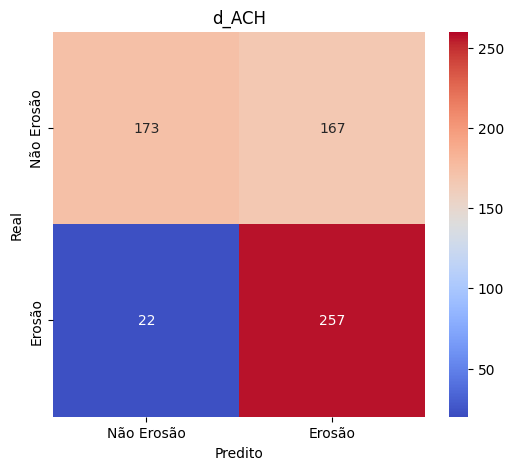

In [15]:
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Exibir a matriz de confusão
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_val, y_pred_ACH), annot=True, fmt="d", cmap='coolwarm', vmin=20, vmax=260, xticklabels=["Não Erosão", "Erosão"], yticklabels=["Não Erosão", "Erosão"])
plt.title("d_ACH")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()


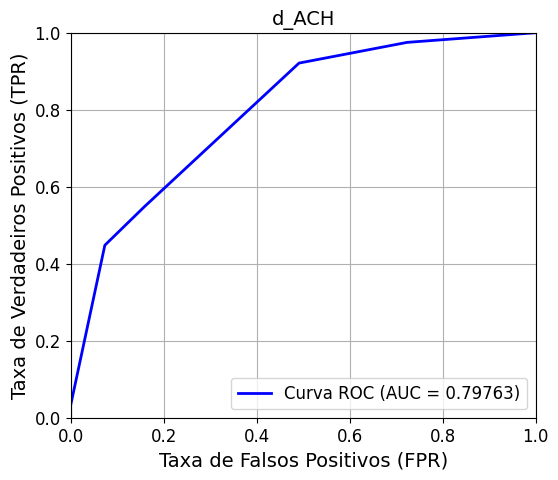

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


# Gerar as probabilidades
y_pred_proba_ACH = best_model.predict_proba(X_val)[:, 1]  # pega a probabilidade da classe positiva

# Calcular a curva ROC
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba_ACH)
roc_auc = auc(fpr, tpr)  # calcular a AUC

# Gerar o gráfico ROC
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label='Curva ROC (AUC = {:.5f})'.format(roc_auc))
#plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')  # linha de 45 graus
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Taxa de Falsos Positivos (FPR)', fontsize=14)
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)', fontsize=14)
plt.title('d_ACH', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
# Aumentar o tamanho dos números dos eixos
plt.tick_params(axis='both', labelsize=12)
plt.grid(True)
plt.show()

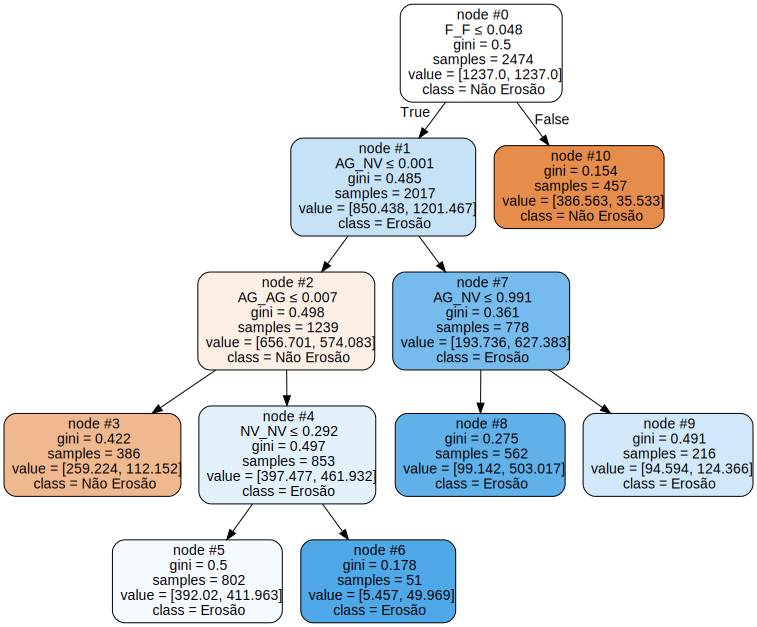

In [41]:
from sklearn.tree import export_graphviz
from graphviz import Source

# Exportar a árvore de decisão para o formato DOT
dot_data = export_graphviz(best_model, out_file=None,
                           feature_names=X.columns,
                           class_names=["Não Erosão", "Erosão"],
                           filled=True, rounded=True,
                           special_characters=True,
                           node_ids=True)

# Gerar e exibir o gráfico diretamente no Colab
graph = Source(dot_data)
graph

In [48]:
# Salvar
graph.render("ad_ACH", format="png", cleanup=True)  # Salva como "ad_ACH.png"

from google.colab import files
files.download("ad_ACH.png")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [51]:
dot_data

'digraph Tree {\nnode [shape=box, style="filled, rounded", color="black", fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label=<node &#35;0<br/>F_F &le; 0.048<br/>gini = 0.5<br/>samples = 2474<br/>value = [1237.0, 1237.0]<br/>class = Não Erosão>, fillcolor="#ffffff"] ;\n1 [label=<node &#35;1<br/>AG_NV &le; 0.001<br/>gini = 0.485<br/>samples = 2017<br/>value = [850.438, 1201.467]<br/>class = Erosão>, fillcolor="#c5e2f7"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label=<node &#35;2<br/>AG_AG &le; 0.007<br/>gini = 0.498<br/>samples = 1239<br/>value = [656.701, 574.083]<br/>class = Não Erosão>, fillcolor="#fcefe6"] ;\n1 -> 2 ;\n3 [label=<node &#35;3<br/>gini = 0.422<br/>samples = 386<br/>value = [259.224, 112.152]<br/>class = Não Erosão>, fillcolor="#f0b88f"] ;\n2 -> 3 ;\n4 [label=<node &#35;4<br/>NV_NV &le; 0.292<br/>gini = 0.497<br/>samples = 853<br/>value = [397.477, 461.932]<br/>class = Erosão>, fillcolor="#e3f1fb"] ;\n2 -> 4 ;\n5 [label=<node &#3

   Feature  Importance  Relative Importance
24     A_A    0.000000             0.000000
19    NV_A    0.000000             0.000000
17   NV_AG    0.000000             0.000000
16   NV_AR    0.000000             0.000000
15    NV_F    0.000000             0.000000
14    AG_A    0.000000             0.000000
22    A_AG    0.000000             0.000000
23    A_NV    0.000000             0.000000
11   AG_AR    0.000000             0.000000
20     A_F    0.000000             0.000000
10    AG_F    0.000000             0.000000
8    AR_NV    0.000000             0.000000
7    AR_AG    0.000000             0.000000
6    AR_AR    0.000000             0.000000
5     AR_F    0.000000             0.000000
4      F_A    0.000000             0.000000
3     F_NV    0.000000             0.000000
2     F_AG    0.000000             0.000000
1     F_AR    0.000000             0.000000
9     AR_A    0.000000             0.000000
21    A_AR    0.000000             0.000000
18   NV_NV    0.047489          

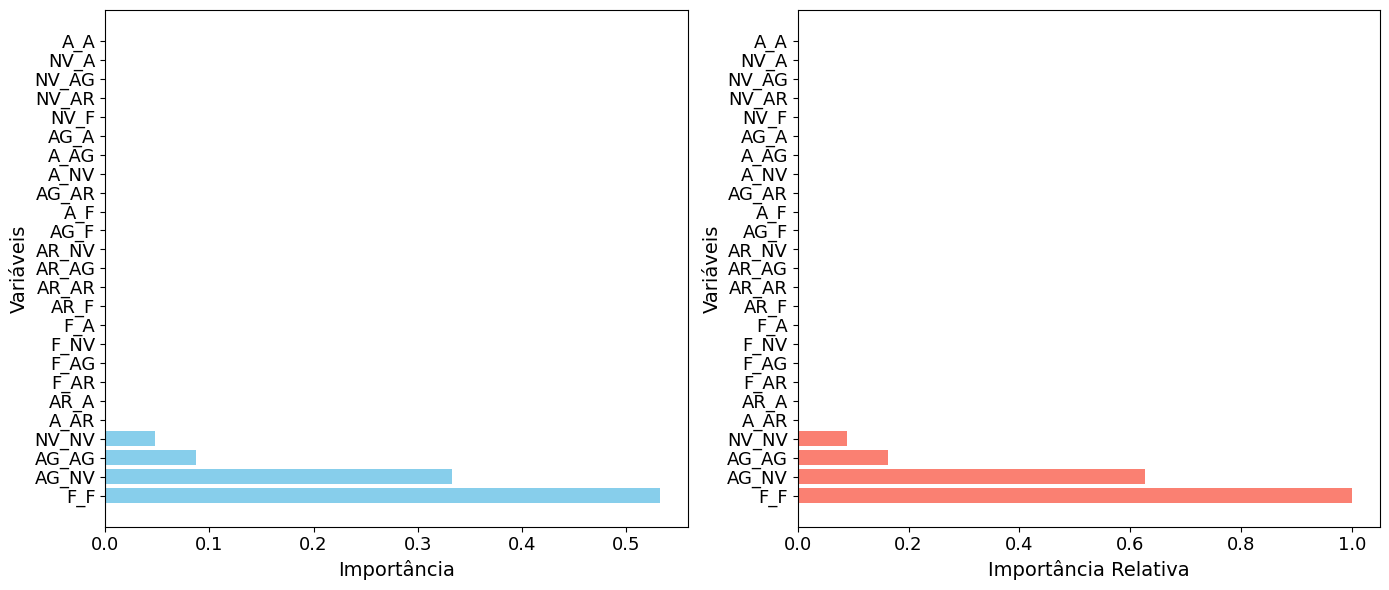

In [50]:
import matplotlib.pyplot as plt
import pandas as pd

importances = best_model.feature_importances_  # Assuming 'model' is previously defined

# Calcular a importância relativa
max_importance = importances.max()  # Identifica a maior importância
importances_relative = importances / max_importance  # Divide todas as importâncias pela maior

# Criar um DataFrame para exibir a importância e a importância relativa
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances,
    'Relative Importance': importances_relative
})

# Ordenar as variáveis pela importância
importance_df = importance_df.sort_values(by='Importance', ascending=True)

# Exibir a tabela de importância e importância relativa
print(importance_df)

# Visualizar os gráficos lado a lado
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # Cria um gráfico com 2 subgráficos lado a lado

# Gráfico de Importância
axes[0].barh(importance_df['Feature'], importance_df['Importance'], align="center", color='skyblue')
#axes[0].set_title("Importância das Variáveis")
axes[0].set_xlabel("Importância", fontsize=14)
axes[0].set_ylabel("Variáveis", fontsize=14)
axes[0].tick_params(axis='both', labelsize=13)  # Ajusta os ticks
axes[0].invert_yaxis()  # Para exibir a barra com a maior importância no topo

# Gráfico de Importância Relativa
axes[1].barh(importance_df['Feature'], importance_df['Relative Importance'], align="center", color='salmon')
#axes[1].set_title("Importância Relativa das Variáveis")
axes[1].set_xlabel("Importância Relativa", fontsize=14)
axes[1].set_ylabel("Variáveis", fontsize=14)
axes[1].tick_params(axis='both', labelsize=13)  # Ajusta os ticks
axes[1].invert_yaxis()  # Para exibir a barra com a maior importância no topo

# Exibir os gráficos
plt.tight_layout()  # Ajustar o layout para evitar sobreposição
plt.show()


In [19]:
!pip install dtreeviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 6.9 MB/s eta 0:00:00


In [23]:
import dtreeviz

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


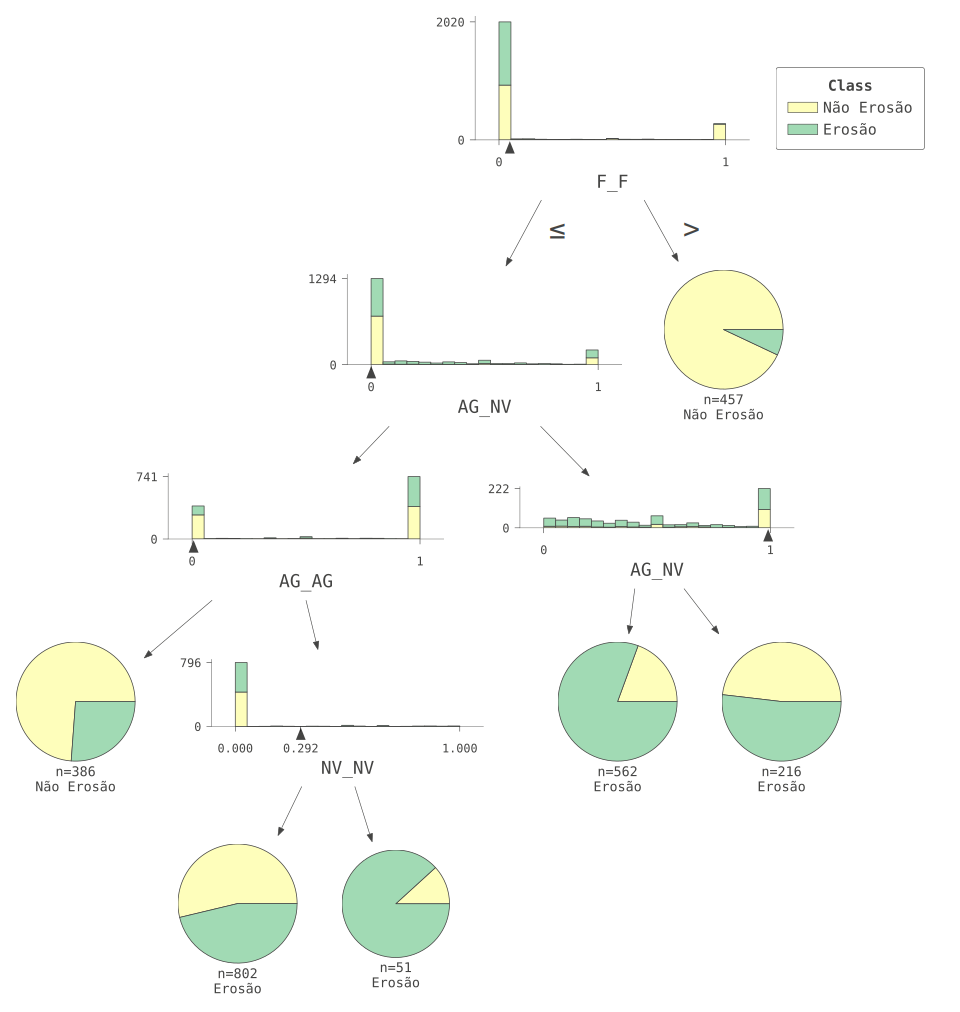

In [37]:
feature_names=X.columns
class_names=["Não Erosão", "Erosão"]

viz = dtreeviz.model(
    best_model, #modelo treinado
    X_train_test, #conjunto de treino
    y_train_test, #target treino
    target_name = 'Class', # nome do target
    feature_names = feature_names, # nome dos atributos
    class_names = class_names, # nome das classes
)

viz.view(fontname='monospace', scale=2.0)